In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

<AxesSubplot:xlabel='Date'>

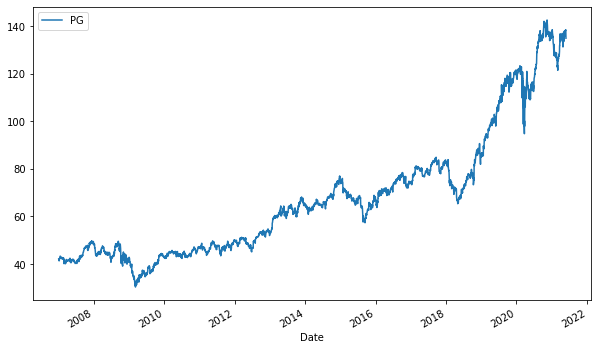

In [4]:
data.plot(figsize = (10, 6))

<AxesSubplot:xlabel='Date'>

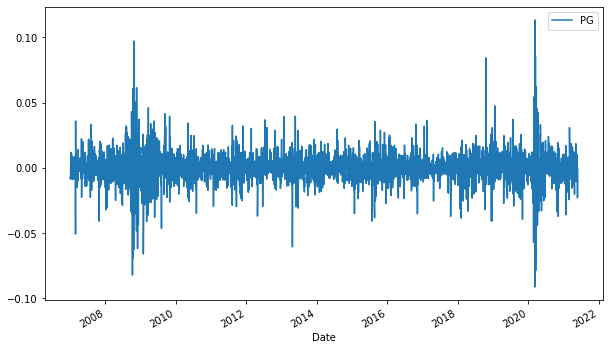

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean() #media
u

PG    0.000321
dtype: float64

In [7]:
var = log_returns.var() #variancia
var

PG    0.00014
dtype: float64

In [8]:
drift = u - (0.5 * var) # isso vem da formula
drift

PG    0.000251
dtype: float64

In [9]:
stdev = log_returns.std() # desvio padrao
stdev

PG    0.011836
dtype: float64

In [10]:
drift.values # equivale a `np.array(drift)` que converte o objeto pandas pra array

array([0.00025093])

In [11]:
stdev.values

array([0.01183593])

In [12]:
norm.ppf(0.95) # usando 95%
# o resultado abaixo equivale a 1.64 desvios padrao de distancia entre a media e os eventos

1.6448536269514722

In [13]:
x = np.random.rand(10, 2)
x

array([[0.89547632, 0.67966622],
       [0.5582901 , 0.76203485],
       [0.31051544, 0.66866298],
       [0.31866374, 0.80925005],
       [0.96988557, 0.3343626 ],
       [0.87915654, 0.70688369],
       [0.77045883, 0.56929106],
       [0.33806518, 0.36717961],
       [0.61043768, 0.71594328],
       [0.50145592, 0.10721166]])

In [14]:
Z = norm.ppf(x) # numero de desvios padrao de distancia entre a media e cada evento

In [15]:
t_intervals = 1000
iterations = 10

# daily_returns = e (numero de Euler) elevado a r
# r = drift + stdev * z

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns # 10 conjuntos de 1000 precos aleatorios das acoes

array([[1.00570685, 0.99167788, 0.99551726, ..., 1.00695497, 1.00927662,
        0.99163755],
       [1.00503744, 0.986186  , 0.99748253, ..., 0.98954385, 1.00066187,
        1.02842861],
       [1.02252221, 0.99814043, 0.98247524, ..., 1.00054651, 0.9961705 ,
        0.97424461],
       ...,
       [1.00356962, 0.99567387, 1.01548639, ..., 1.00482936, 1.00259071,
        1.01414923],
       [1.01245383, 1.00384203, 0.97826142, ..., 0.99494809, 1.00366629,
        1.00375309],
       [0.99795898, 0.98069965, 1.02064245, ..., 1.01202259, 1.01183476,
        0.99393721]])

In [19]:
# Comecando a simulacao de precos
price_list = np.zeros_like(daily_returns) # cria uma matriz de zeros com o mesmo tamanho da matriz de retornos diarios
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
price_list[0] = data.iloc[-1] # o primeiro preco da simulacao sera o ultimo da lista de precos consultados
price_list

array([[134.8500061, 134.8500061, 134.8500061, ..., 134.8500061,
        134.8500061, 134.8500061],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [23]:
for t in range(1, t_intervals) :
    price_list[t] = price_list[t - 1] * daily_returns[t]
    
price_list

array([[134.8500061 , 134.8500061 , 134.8500061 , ..., 134.8500061 ,
        134.8500061 , 134.8500061 ],
       [135.52930461, 132.98718848, 134.51052586, ..., 133.43999401,
        134.93925882, 138.68360424],
       [138.58172434, 132.73988903, 132.15326067, ..., 133.51292014,
        134.42250877, 135.11175439],
       ...,
       [417.12140099, 137.68284754,  95.52432748, ..., 112.14678385,
        225.30214018, 119.82590784],
       [422.316161  , 138.2118289 ,  93.44776417, ..., 111.58022844,
        226.12816251, 120.27562528],
       [421.4542042 , 135.54429246,  95.37675492, ..., 112.92171196,
        228.80433567, 119.54641962]])

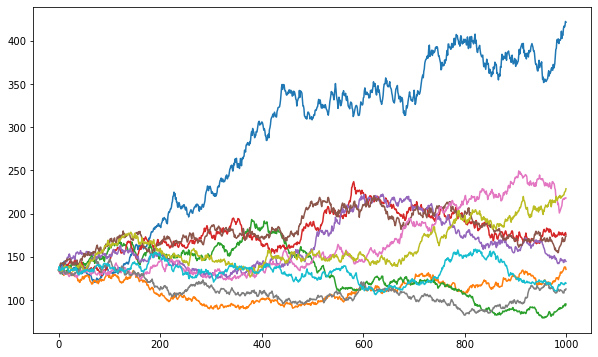

In [27]:
plt.figure(figsize = (10, 6))
plt.plot(price_list);